In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import transforms3d as tf3d


In [2]:

log1=pd.read_csv('/home/mehdi/Documents/identification_modele_avion/Logs/log_real/log_6_2021-7-20-11-41-56/log_real.csv')
log2=pd.read_csv('/home/mehdi/Documents/identification_modele_avion/Logs/log_real/log_5_2021-7-20-11-12-20/log_real.csv')
log3=pd.read_csv('/home/mehdi/Documents/identification_modele_avion/Logs/log_real/log_4_2021-7-20-10-58-16/log_real.csv')


def gen_grad_acc(df):
    
    df3=df
    
    acc_ned_grad=np.zeros((len(df3),3))

    acc_ned_grad[:,0]=np.diff(df3['speed[0]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,0]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,0]])

    acc_ned_grad[:,1]=np.diff(df3['speed[1]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,1]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,1]])


    acc_ned_grad[:,2]=np.diff(df3['speed[2]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,2]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,2]])

    acc_body_grad=np.zeros((len(df3),3))

    for i in df3.index:
        q0,q1,q2,q3=df3["q[0]"][i],df3["q[1]"][i],df3["q[2]"][i],df3["q[3]"][i]
         #print(i,q0,q1,q2,q3)
        R=tf3d.quaternions.quat2mat(np.array([q0,q1,q2,q3]))
        acc_body_grad[i]=R.T@(acc_ned_grad[i].reshape((3,1))).flatten()
        
    
  #  df3['acc_ned_grad[0]'],df3['acc_ned_grad[1]'],df3['acc_ned_grad[2]']=acc_ned_grad.T
  #  df3['acc_body_grad[0]'],df3['acc_body_grad[1]'],df3['acc_body_grad[2]']=acc_body_grad.T
    
    return df3


log1_new=gen_grad_acc(log1)
log2_new=gen_grad_acc(log2)
log3_new=gen_grad_acc(log3)

#log1_new.to_csv('/home/mehdi/Documents/identification_modele_avion/Logs/log_real/log_real.csv')

In [3]:
log1_new

,Unnamed: 0,t,acc[0],acc[1],acc[2],speed[0],speed[1],speed[2],pos[0],pos[1],...,forces[1],forces[2],torque[0],torque[1],torque[2],joystick[0],joystick[1],joystick[2],joystick[3],takeoff
0,95241,272.942524,3.354432,-3.925558,-0.329300,18.571797,9.361443,-5.656964,67.650934,32.911508,...,-33.367241,-2.799049,5.984090,0.397274,-2.220571,0.625415,34.572560,-18.970657,250.0,1
1,95242,272.944997,3.361175,-3.919483,-0.307332,18.578026,9.354883,-5.654156,67.695214,32.936160,...,-33.315605,-2.612321,-0.564953,1.376441,2.582996,0.578789,34.523090,-18.966677,250.0,1
2,95243,272.947497,3.367992,-3.913342,-0.285124,18.584322,9.348250,-5.651316,67.739976,32.961081,...,-33.263406,-2.423554,2.884273,-5.372800,1.953783,0.570857,34.707028,-18.994230,250.0,1
3,95244,272.950024,3.374883,-3.907134,-0.262676,18.590687,9.341547,-5.648446,67.785223,32.986271,...,-33.210643,-2.232748,-2.271870,-4.013266,4.529909,0.573526,34.956725,-19.030688,250.0,1
4,95245,272.952491,3.381610,-3.901074,-0.240762,18.596900,9.335002,-5.645644,67.829394,33.010864,...,-33.159132,-2.046473,-5.610705,-2.526386,4.518737,0.594357,35.163656,-19.069601,250.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32669,127910,376.612488,0.281193,0.610181,-1.219775,16.184813,5.307068,2.707264,-124.496048,-72.637414,...,5.186537,-10.368084,-0.836594,0.016395,-0.099743,28.488154,31.590620,-19.733454,-250.0,1
32670,127911,376.614999,0.262577,0.615879,-1.217461,16.185063,5.309244,2.701285,-124.455388,-72.623980,...,5.234974,-10.348420,-1.405757,-0.218377,-0.199066,28.534381,31.593104,-19.743079,-250.0,1
32671,127912,376.617487,0.244132,0.621525,-1.215169,16.185312,5.311401,2.695362,-124.415100,-72.610669,...,5.282966,-10.328937,-0.884747,-0.163765,-0.419238,28.556425,31.600368,-19.748305,-250.0,1
32672,127913,376.620000,0.225501,0.627228,-1.212854,16.185563,5.313579,2.689379,-124.374408,-72.597224,...,5.331442,-10.309258,1.227976,-0.229626,-0.609703,28.573057,31.608844,-19.752562,-250.0,1


In [4]:
log2_new

,Unnamed: 0,t,acc[0],acc[1],acc[2],speed[0],speed[1],speed[2],pos[0],pos[1],...,forces[1],forces[2],torque[0],torque[1],torque[2],joystick[0],joystick[1],joystick[2],joystick[3],takeoff
0,8339,24.304931,2.410484,-4.368378,2.438569,21.756273,-0.294534,-0.582353,71.726695,25.696539,...,-37.131214,20.727840,1.555010,-4.143932,-2.281813,103.327019,49.721508,-13.495275,250.0,1
1,8340,24.307450,2.374961,-4.366017,2.454980,21.760210,-0.305336,-0.574418,71.782185,25.695415,...,-37.111147,20.867326,-8.177080,-1.662119,3.799920,103.442818,49.855607,-13.531029,250.0,1
2,8341,24.309934,2.339932,-4.363689,2.471162,21.764092,-0.315987,-0.566593,71.836905,25.694308,...,-37.091359,21.004874,-3.833012,-4.354798,2.874203,103.574842,49.999596,-13.572037,250.0,1
3,8342,24.312435,2.304663,-4.361345,2.487455,21.768000,-0.326712,-0.558714,71.891999,25.693193,...,-37.071435,21.143364,2.337938,-7.605800,3.242113,103.633188,50.280257,-13.630807,250.0,1
4,8343,24.314982,2.268746,-4.358958,2.504047,21.771980,-0.337634,-0.550690,71.948106,25.692057,...,-37.051145,21.284400,-3.934531,-4.959027,6.688809,103.677278,50.593968,-13.694251,250.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50165,58504,171.544933,-1.178927,2.860142,-1.984316,16.387627,6.329674,2.363185,-87.899127,-57.433505,...,24.311208,-16.866686,-12.153572,-0.900997,2.811116,36.617695,35.510147,-20.554572,-250.0,1
50166,58505,171.547432,-1.182725,2.861320,-2.004184,16.384919,6.337184,2.358282,-87.858052,-57.417380,...,24.321221,-17.035560,-11.551967,-0.002611,1.847867,36.888334,35.486238,-20.590608,-250.0,1
50167,58506,171.549942,-1.186540,2.862503,-2.024139,16.382199,6.344726,2.353357,-87.816797,-57.401184,...,24.331279,-17.205177,-10.467834,1.283256,1.281599,37.153463,35.446112,-20.622345,-250.0,1
50168,58507,171.552439,-1.190335,2.863680,-2.043990,16.379492,6.352229,2.348457,-87.775756,-57.385072,...,24.341284,-17.373916,-9.201481,1.812278,1.413404,37.379771,35.344773,-20.653388,-250.0,1


In [5]:
log3_new

,Unnamed: 0,t,acc[0],acc[1],acc[2],speed[0],speed[1],speed[2],pos[0],pos[1],...,forces[1],forces[2],torque[0],torque[1],torque[2],joystick[0],joystick[1],joystick[2],joystick[3],takeoff
0,26932,77.837449,-0.768227,0.111271,-0.920329,19.942855,0.441471,-4.761419,74.664354,12.941003,...,0.945808,-7.822793,4.396269,5.424967,1.662540,47.419941,39.862884,5.279753,250.0,1
1,26933,77.839955,-0.775052,0.111868,-0.874219,19.940777,0.442892,-4.767189,74.714289,12.942583,...,0.950876,-7.430861,7.160184,3.977561,-2.391927,47.320911,39.631167,5.282775,250.0,1
2,26934,77.842554,-0.782130,0.112486,-0.826398,19.938622,0.444367,-4.773174,74.766076,12.944222,...,0.956132,-7.024383,5.522018,2.534913,-2.520194,47.245356,39.370450,5.301975,250.0,1
3,26935,77.844958,-0.788677,0.113058,-0.782165,19.936629,0.445730,-4.778710,74.813978,12.945738,...,0.960994,-6.648403,2.421004,7.960141,-1.234574,47.180475,39.125532,5.322696,250.0,1
4,26936,77.847515,-0.795640,0.113667,-0.735117,19.934509,0.447181,-4.784598,74.864929,12.947351,...,0.966166,-6.248495,11.332743,3.051329,-6.911496,46.997928,38.985306,5.385995,250.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48262,75194,222.227435,-0.313448,0.132906,-0.074797,7.991694,14.791980,2.962575,-37.113750,-66.907030,...,1.129704,-0.635774,3.211378,0.730394,-1.144464,49.736210,33.018301,-22.758867,-250.0,1
48263,75195,222.229943,-0.296547,0.119100,-0.062803,7.990351,14.792308,2.962767,-37.093880,-66.869937,...,1.012350,-0.533826,1.891373,1.927241,-1.372247,49.683500,32.936118,-22.737289,-250.0,1
48264,75196,222.232436,-0.279748,0.105376,-0.050881,7.989017,14.792634,2.962958,-37.074129,-66.833066,...,0.895699,-0.432487,2.463076,1.449472,-1.382219,49.630368,32.863680,-22.715947,-250.0,1
48265,75197,222.234953,-0.262786,0.091520,-0.038844,7.987669,14.792963,2.963151,-37.054188,-66.795840,...,0.777924,-0.330173,2.575639,0.750521,-1.028600,49.576548,32.792755,-22.694425,-250.0,1


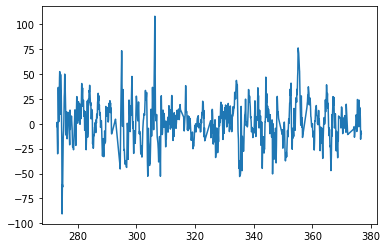

In [6]:
plt.plot(log1.t,log1['forces[2]'])

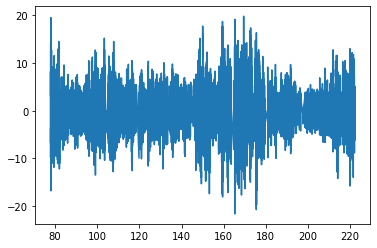

In [7]:
plt.plot(log3.t,log3['omegadot[0]'])

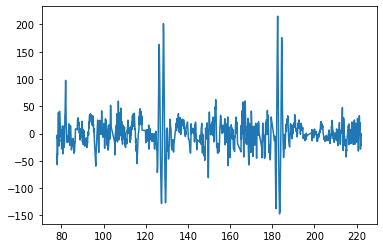

In [8]:
plt.plot(log3.t,log3['forces[2]'])

In [9]:
log1_r=log1[log1["t"]>40]
log1_r=log1_r[log1_r["t"]<450]

log2_r=log2[log2["t"]>10]
log2_r=log2_r[log2_r['t']<250]

log3_r=log3

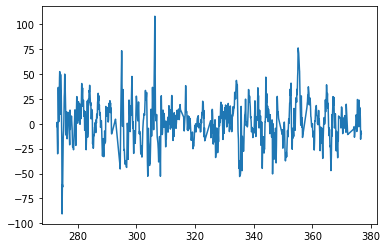

In [10]:
plt.plot(log1_r.t,log1_r['forces[2]'])

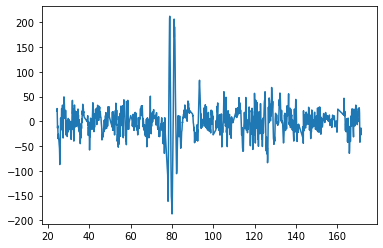

In [11]:
plt.plot(log2_r.t,log2_r['forces[2]'])

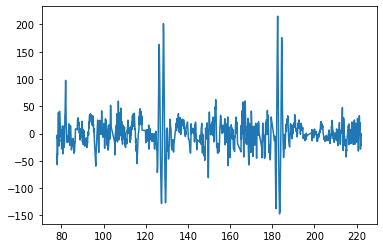

In [12]:
plt.plot(log3_r.t,log3_r['forces[2]'])

In [13]:
log1_r["t"]=log1_r["t"]-log1_r['t'].min()
log2_r["t"]=log2_r["t"]-log2_r['t'].min()+5e-3+log1_r["t"].max()
log3_r["t"]=log3_r["t"]-log3_r['t'].min()+5e-3+log2_r["t"].max()


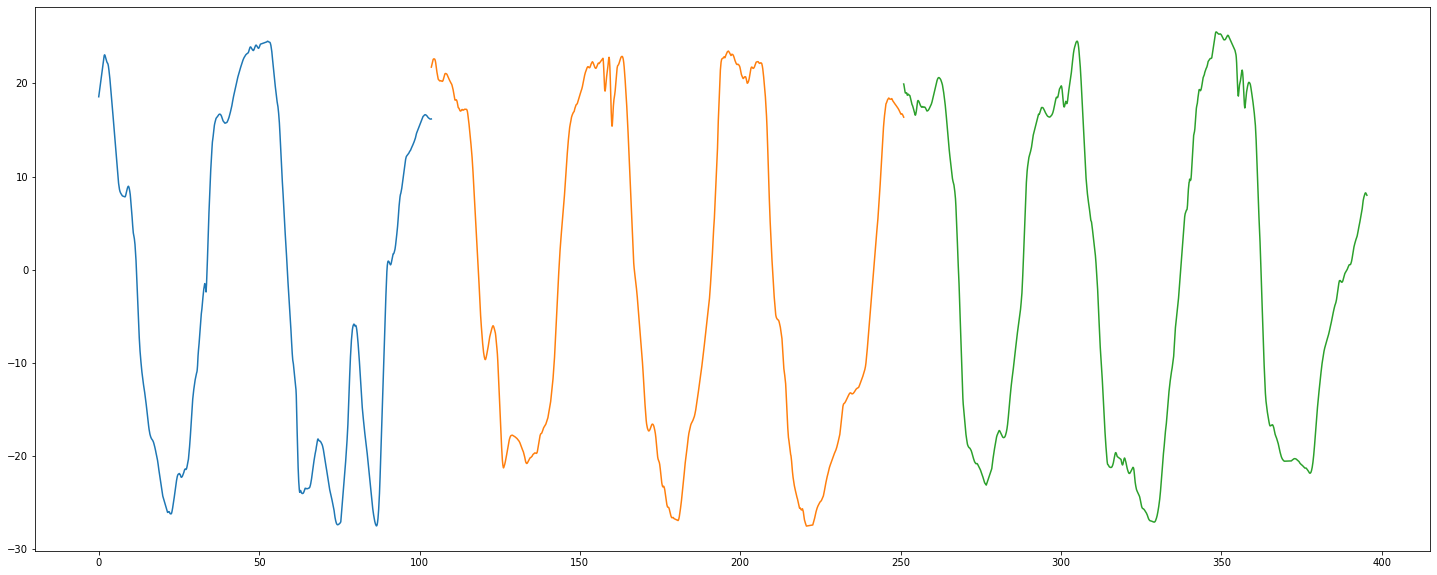

In [14]:
plt.figure(1, figsize=(25, 10))
plt.plot(log1_r.t,log1_r['speed[0]'])
plt.plot(log2_r.t,log2_r['speed[0]'])
plt.plot(log3_r.t,log3_r['speed[0]'])

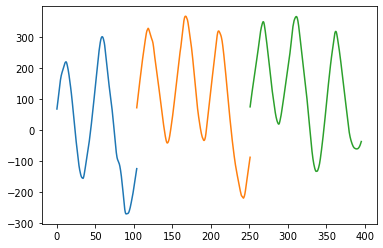

In [15]:
plt.plot(log1_r.t,log1_r['pos[0]'])
plt.plot(log2_r.t,log2_r['pos[0]'])
plt.plot(log3_r.t,log3_r['pos[0]'])

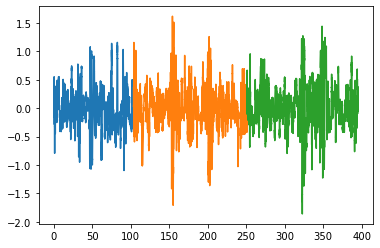

In [16]:
plt.plot(log1_r.t,log1_r['omega[0]'])
plt.plot(log2_r.t,log2_r['omega[0]'])
plt.plot(log3_r.t,log3_r['omega[0]'])

In [17]:
df3=pd.concat([log1_r,log2_r,log3_r])
angle=[]
for i in log1_r.index:
    q0,q1,q2,q3=df3["q[0]"][i].values[0],df3["q[1]"][i].values[0],df3["q[2]"][i].values[0],df3["q[3]"][i].values[0]
    angle.append(tf3d.euler.quat2euler(np.array([q0,q1,q2,q3])))


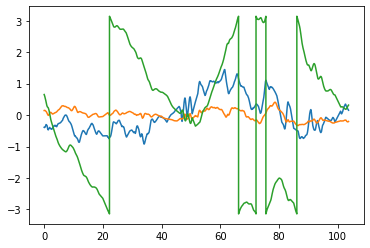

In [18]:
#plt.figure(1, figsize=(25, 10))
plt.plot(log1_r.t, angle)

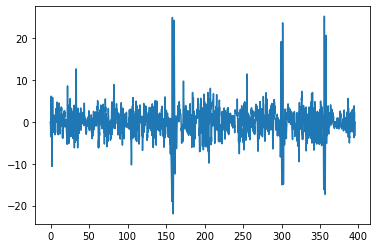

In [19]:
plt.plot(df3.t,df3['acc[2]'])

In [20]:
df3=df3.reset_index()

In [21]:
import transforms3d as tf3d

In [22]:
df3.to_csv('/home/mehdi/Documents/identification_modele_avion/Logs/log_real/log_real.csv')

[(<Figure size 432x288 with 1 Axes>,
  (0.0, 30.0)),
 (<Figure size 432x288 with 1 Axes>,
  (0.0, 30.0)),
 (<Figure size 432x288 with 1 Axes>,
  (0.0, 30.0)),
 (<Figure size 432x288 with 1 Axes>,
  (0.0, 30.0))]

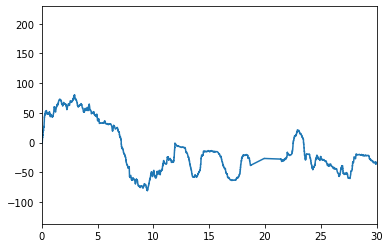

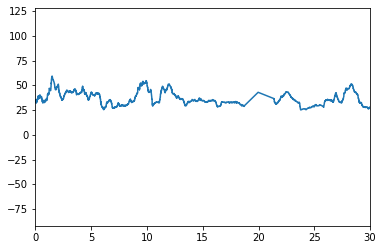

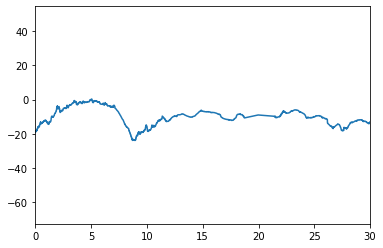

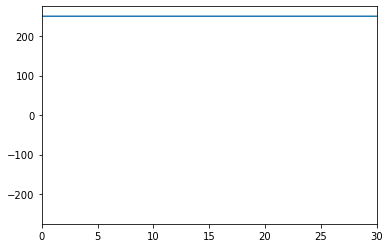

In [30]:
p=0

[(plt.figure(),plt.plot(df3["t"],df3['joystick[%i]'%(i)]),plt.xlim((p,p+30))) for i in range(4)]
        


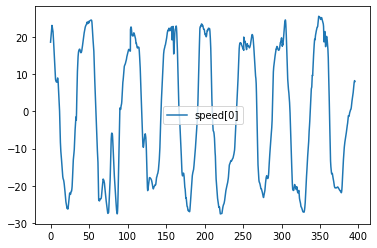

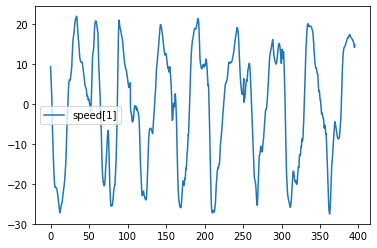

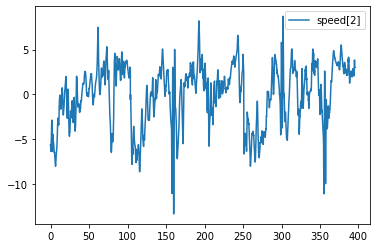

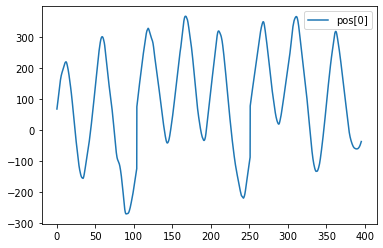

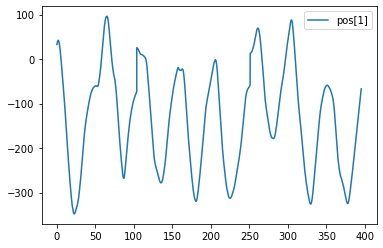

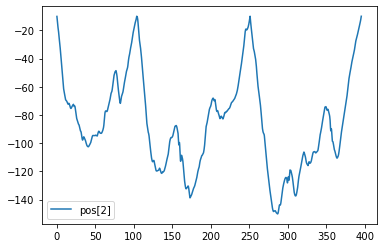

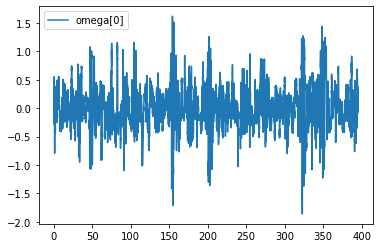

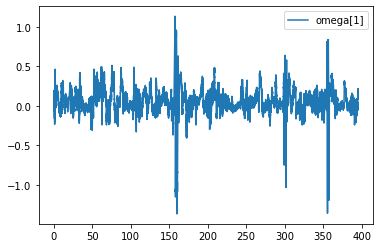

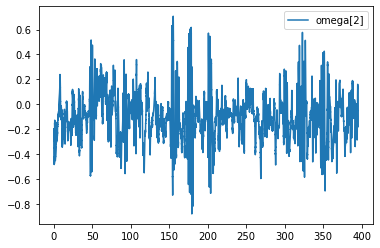

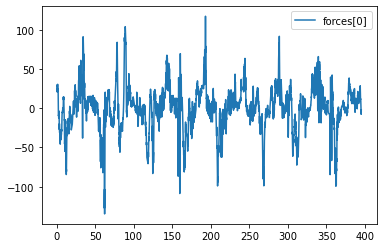

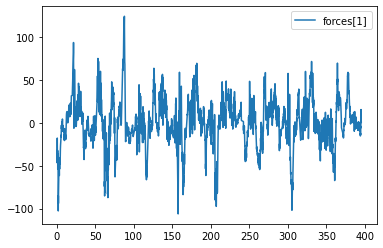

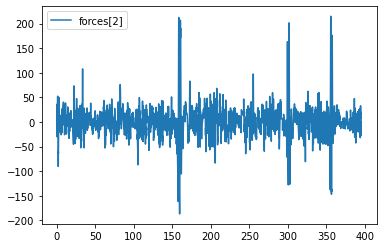

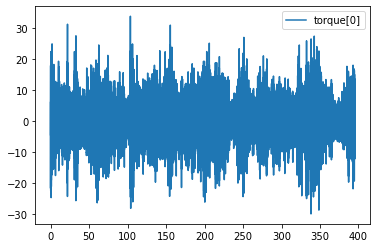

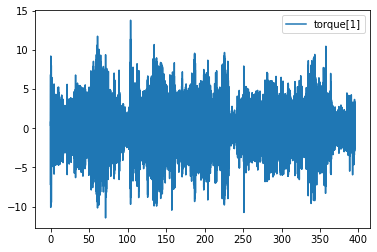

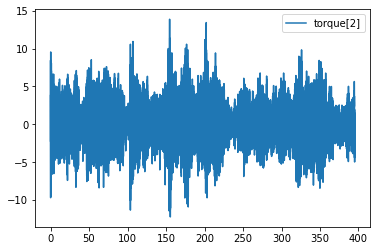

In [31]:
for key in df3.keys():
    if key not in ["index", "Unnamed: 0", "t", "takeoff", "q[0]","q[1]","q[2]","q[3]", "acc[0]","acc[1]", "acc[2]",  "omegadot[0]","omegadot[1]", "omegadot[2]", "joystick[0]","joystick[1]","joystick[2]","joystick[3]"]:
        plt.figure()
        plt.plot(df3.t, df3[key], label=key)
        #plt.xlim((p,p+30))
        plt.legend()